In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText
from scipy.integrate import solve_ivp


from scipy.integrate import complex_ode
from matplotlib import pyplot
import seaborn as sns
from scipy import stats


**Parameters**

$N=19$

$k_0=2^{-4}$

$f_n=\delta_{n,4}(1+i)5\cdot10^{-3}$

$\nu=10^{-6}$

In [ ]:
N=19
knn=np.power(2,np.arange(N+4))
kn=knn*np.power(2,-4.)


In [ ]:
def shellmodel(t, u):
      nu=1e-6
      an=np.ones(N+4)
      bn=-0.5*np.ones(N+4)
      cn=-0.5*np.ones(N+4)
      fn=np.zeros(N+4,dtype=complex)
      #cn=np.zeros(N+4)
      #cn=(1.-bn)


      an[N+3]=0.
      an[N+2]=0.

      bn[0]=0.
      bn[N+3]=0.

      cn[0]=0.
      cn[1]=0.

      fn[4]=(1.+1.j)*5.e-3
      res=np.zeros((N+4),dtype=complex)
      #a,b,c=-1.,0.5,0.5
      #print((2,N+2),res.shape[0])

      eta=np.power(nu**3/(np.abs(fn[3])),1/4.)
      #print(1/eta)

      for i in range(2, N+2):
          #SABRA U
          #print(i)                                                                        
          #                                                                                       
          #                                                                                       
          res[i]=1j*(an[i-2]*kn[i+1]*u[i+2]*np.conjugate(u[i+1])+bn[i-2]*kn[i]*u[i+1]*np.conjugate(u[i-1])-cn[i-2]*kn[i-1]*u[i-1]*u[i-2])+fn[i]-nu*kn[i]**2*u[i] 
      return  res


In [ ]:
nu=1e-6
fn=(1.+1j)*5.e-3
eta=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta)

9170.040432046713


In [ ]:
taueta=np.power(nu/(np.abs(fn)),0.5)
print(taueta)


0.01189207115002721


In [ ]:
Un=1e-3*kn**(-1)*(1.+1.j)*np.ones(N+4,dtype=complex)
#Un2=np.load('./Uf.npy')
#Un2=Un2[:,-1]
#u0=1j*np.ones((2*(N+4)))
u0=np.array(Un)
#u0=u0.reshape(1,2*(N+4))
#u20=2*np.ones(N)

t=0
r = complex_ode(shellmodel).set_integrator('vode', method='bdf',order='2')
r.set_initial_value(u0,0)
t1 = 500
dt = 1e-2
#print(r.successful(),r.t,t1)
i=0
a=[]
while r.successful() and r.t < t1:
      r.t
      a.append(r.integrate(r.t+dt))
      i=i+1
      if (i%50000==0):
        print(np.mean(np.sum((np.transpose(a)*np.conj(np.transpose(a))).real,axis=0)))
        print(i)
Uf=np.transpose(a)
np.save('./Uf_N19_'+str(i)+'_points',Uf)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in double_scalars


KeyboardInterrupt: ignored

In [ ]:
np.save('./Uf',Uf)

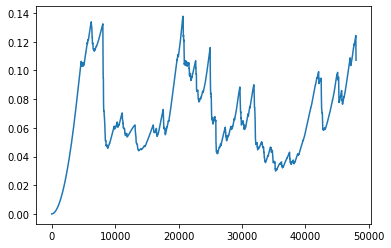

In [ ]:
Uf2=Uf[2:-2]
Energy=np.sum((Uf2*np.conj(Uf2)).real,axis=0)
plt.plot((Energy))
#plt.loglog()
#plt.plot(np.sum((Un*np.conj(Un)).real,axis=0))

#plt.ylim(Energy[0],4.266e-5)
#plt.xlim(0,20)
plt.show()
np.save('./En_N19_'+str(i)+'_points',Uf)


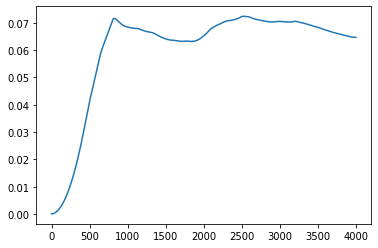

In [ ]:
a=[]
for i in range(10,len(Energy[:]),10):
  a.append(np.mean(Energy[0:i]))
  #print(i)
plt.plot(a)

In [ ]:
epsilon=2*np.real(np.mean(np.conj(Uf[4])*fn))
epsilon

0.0020031494911618504

In [ ]:
eta=np.power(nu**3/(epsilon),1/4.)
eta2=np.power(nu**3/(np.abs(fn)),1/4.)
print(1/eta,1/eta2)

6690.0342360803115 9170.040432046713


In [ ]:
#print(np.mean((Uf*np.conj(Uf)),1),Uf[2].shape[:])

In [ ]:
#print(Uf.shape[:],Un.shape[:])

In [ ]:
#plt.plot(kn,(Un*np.conj(Un)).real,'bo')
#plt.loglog()
#plt.show()

In [ ]:
#Uf_stat.shape[:]
#Uf_stat=Uf
Uf_stat=Uf[:,10000:]
#Uf_stat_old=np.load('./Uf_stat.npy')


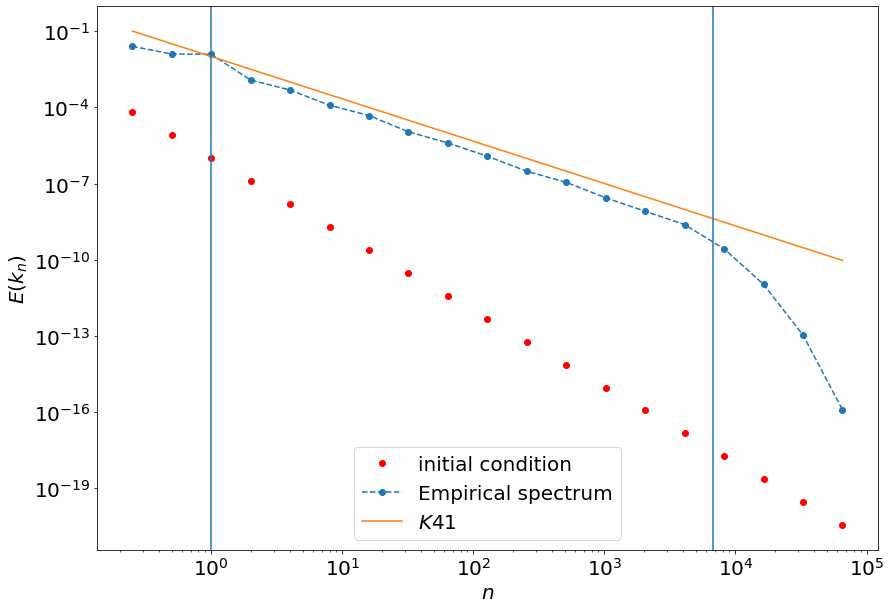

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(kn[2:-2],(Un*np.conj(Un)).real[2:-2]/(2*kn[2:-2]),'ro',label='initial condition')
plt.plot(kn[2:-2],(np.mean((Uf_stat*np.conj(Uf_stat)),1).real)[2:-2]/(2*kn[2:-2]),'o--',label='Empirical spectrum')
#plt.plot(kn[2:-2],(np.mean((Uf_stat_old*np.conj(Uf_stat_old)),1).real)[2:-2],'o--',label='S2')

plt.plot(kn[2:-2],1e-2*kn[2:-2]**(-5/3.),label=r'$K41$')
plt.axvline(x=1/eta)
plt.axvline(x=kn[4])
plt.xlabel(r'$n$', fontsize=20)
plt.ylabel(r'$E(k_n)$', fontsize=20)
plt.legend(fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#pyplot.annotate(r'$k_{in}$',(kn[3],1e-19),fontsize='20')
#pyplot.annotate(r'$k_{out}$',(1/eta,1e-19),fontsize='20')
plt.loglog()
#plt.savefig('./K41_shell_model_N=20')
plt.show()
#np.save('./sol_0.02.npy',(np.mean((Uf*np.conj(Uf)),1).real)[2:-2])

In [ ]:
 np.save('./Uf_stat',Uf_stat)

**structure functions in all their beauty**

In [ ]:
print(len(np.mean(np.abs(Uf[2:-2].T),axis=0)))

20


In [ ]:
Ufdisp=Uf[:]

In [ ]:
Sdispari=[]
for i in range(N):
  
  a=np.imag(np.mean(((Ufdisp[i,:]*(Ufdisp[i+1,:])*np.conj((Ufdisp[i+2,:]))))))
  Sdispari.append(a)
print(Sdispari)

[0.0001983505355356922, 3.127654206023635e-05, -4.6625211726579176e-06, -0.0017885654667686701, -0.00044512657030529746, -0.0003305357201999883, -0.00013455440732832144, -6.941541365929243e-05, -3.0046888991683212e-05, -8.912667896385612e-06, -5.192230624510041e-07, -2.2720842603726017e-09]


In [ ]:
plt.figure(figsize=(14,10))
Uf3=np.abs(Uf[2:-2])
S1=np.mean(((Uf3)),1)
S2=np.mean((Uf3)**2,1)
S3=np.mean((Uf3)**3,1)
S4=np.mean((Uf3)**4,1)
S5=np.mean((Uf3)**5,1)
S6=np.mean((Uf3)**6,1)
S7=np.mean((Uf3)**7,1)
S8=np.mean((Uf3)**8,1)
S9=np.mean((Uf3)**9,1)
S10=np.mean((Uf3)**10,1)
S12=np.mean((Uf3)**12,1)
S14=np.mean((Uf3)**14,1)


print(len(S2),len(S4)) 

19 19


<Figure size 1008x720 with 0 Axes>

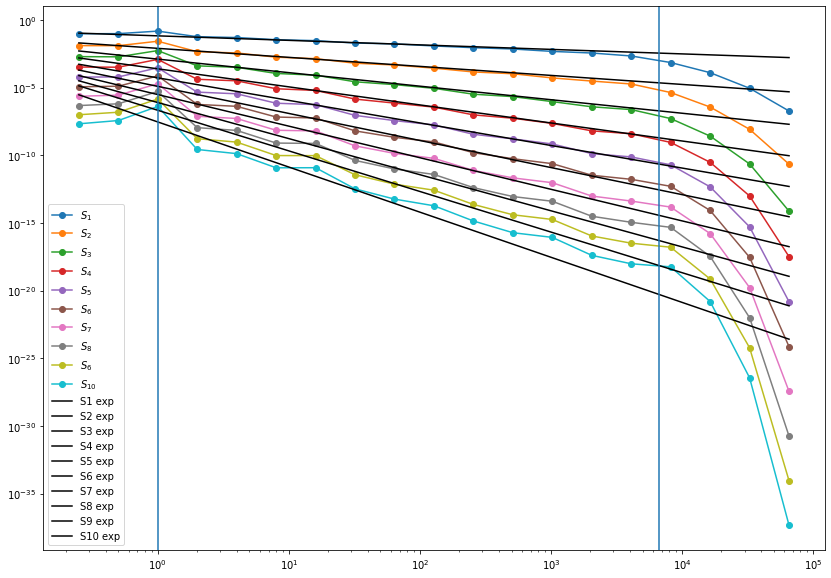

In [ ]:
plt.figure(figsize=(14,10))

#plt.plot(kn[2:-2],S1,'o-',label='S1')
plt.plot((kn[2:-2]),(S1),'o-',label=r'$S_1$')
plt.plot((kn[2:-2]),(S2),'o-',label=r'$S_2$')
plt.plot((kn[2:-2]),(S3),'o-',label=r'$S_3$')
plt.plot((kn[2:-2]),(S4),'o-',label=r'$S_4$')
plt.plot((kn[2:-2]),(S5),'o-',label=r'$S_5$')
plt.plot((kn[2:-2]),(S6),'o-',label=r'$S_6$')
plt.plot((kn[2:-2]),(S7),'o-',label=r'$S_7$')
plt.plot((kn[2:-2]),(S8),'o-',label=r'$S_8$')
plt.plot((kn[2:-2]),(S9),'o-',label=r'$S_6$')
plt.plot((kn[2:-2]),(S10),'o-',label=r'$S_{10}$')
#plt.plot((kn[2:-2]),(S12),'o-',label=r'$S_{12}$')
#plt.plot((kn[2:-2]),(S14),'o-',label=r'$S_{14}$')


plt.plot(kn[2:-2],np.mean(S1[:8])*kn[2:-2]**(-1/3.),label='S1 exp',color='black')
plt.plot(kn[2:-2],np.mean(S2[:8])*kn[2:-2]**(-2/3.),label='S2 exp',color='black')
plt.plot(kn[2:-2],np.mean(S3[:8])*kn[2:-2]**(-3/3.),label='S3 exp',color='black')
plt.plot(kn[2:-2],np.mean(S4[:8])*kn[2:-2]**(-4/3.),label='S4 exp',color='black')
plt.plot(kn[2:-2],np.mean(S5[:8])*kn[2:-2]**(-5/3.),label='S5 exp',color='black')
plt.plot(kn[2:-2],np.mean(S6[:8])*kn[2:-2]**(-6/3.),label='S6 exp',color='black')
plt.plot(kn[2:-2],np.mean(S7[:8])*kn[2:-2]**(-7/3.),label='S7 exp',color='black')
plt.plot(kn[2:-2],np.mean(S8[:8])*kn[2:-2]**(-8/3.),label='S8 exp',color='black')
plt.plot(kn[2:-2],np.mean(S9[:8])*kn[2:-2]**(-9/3.),label='S9 exp',color='black')
plt.plot(kn[2:-2],np.mean(S10[:2])*kn[2:-2]**(-10/3.),label='S10 exp',color='black')
#plt.plot(kn[2:-2],np.mean(S12[:1])*kn[2:-2]**(-12/3.),label='S12 exp',color='black')
#plt.plot(kn[2:-2],np.mean(S14[:1])*kn[2:-2]**(-14/3.),label='S14 exp',color='black')

#plt.ylim(5e-23,5e-1)
plt.axvline(x=1/eta)
plt.axvline(x=kn[4])
plt.loglog()#basex=2, basey=2)
plt.legend()
plt.show()

In [ ]:
import seaborn as sns

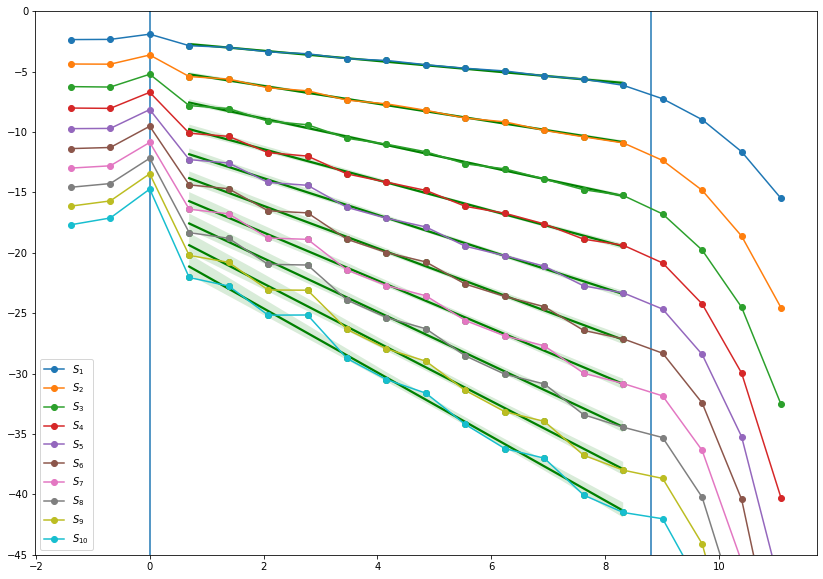

In [ ]:
plt.figure(figsize = (14,10))
plt.axvline(x=np.log(1/eta))
plt.axvline(x=np.log(kn[4]))

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S1[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S1),'o-',label=r'$S_1$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S2[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S2),'o-',label=r'$S_2$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S3[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S3),'o-',label=r'$S_3$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S4[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S4),'o-',label=r'$S_4$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S5[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S5),'o-',label=r'$S_5$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S6[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S6),'o-',label=r'$S_6$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S7[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S7),'o-',label=r'$S_7$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S8[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S8),'o-',label=r'$S_8$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S9[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S9),'o-',label=r'$S_9$')

ax = sns.regplot(x=np.log(kn[2:-2][3:-4]), y=np.log(S10[3:-4]), color="g")
plt.plot(np.log(kn[2:-2]),np.log(S10),'o-',label=r'$S_{10}$')



plt.ylim(-45,0)

plt.legend()
plt.show()

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log(kn[2:-2][2:-4]),np.log(S2[2:-4]))

In [ ]:
S1f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S1[3:-4]))
S2f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S2[3:-4]))
S3f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S3[3:-4]))
S4f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S4[3:-4]))
S5f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S5[3:-4]))
S6f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S6[3:-4]))
S7f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S7[3:-4]))
S8f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S8[3:-4]))
S9f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S9[3:-4]))
S10f=stats.linregress(np.log(kn[2:-2][3:-4]),np.log(S10[3:-4]))

In [ ]:
sn1=["%.3f" % S1f.slope,"%.3f" %S2f.slope,"%.3f" %S3f.slope,"%.3f" %S4f.slope,"%.3f" %S5f.slope,"%.3f" %S6f.slope,"%.3f" %S7f.slope,"%.3f" %S8f.slope,"%.3f" %S9f.slope,"%.3f" %S10f.slope]
sn1=-np.array(sn1).astype('float')
sn1

array([0.421, 0.736, 1.015, 1.273, 1.518, 1.754, 1.984, 2.209, 2.431,
       2.651])

In [ ]:
S1f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S1[3:-3]))
S2f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S2[3:-3]))
S3f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S3[3:-3]))
S4f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S4[3:-3]))
S5f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S5[3:-3]))
S6f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S6[3:-3]))
S7f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S7[3:-3]))
S8f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S8[3:-3]))
S9f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S9[3:-3]))
S10f2=stats.linregress(np.log(kn[2:-2][3:-3]),np.log(S10[3:-3]))

In [ ]:
sn2=["%.3f" % S1f2.slope,"%.3f" %S2f2.slope,"%.3f" %S3f2.slope,"%.3f" %S4f2.slope,"%.3f" %S5f2.slope,"%.3f" %S6f2.slope,"%.3f" %S7f2.slope,"%.3f" %S8f2.slope,"%.3f" %S9f2.slope,"%.3f" %S10f2.slope]
sn2=-np.array(sn2).astype('float')
sn2

array([0.47 , 0.784, 1.052, 1.296, 1.527, 1.75 , 1.966, 2.178, 2.388,
       2.595])

**Prediction VS Model**


In [ ]:
#VALORI DA TOSCHI#

sn_SHE_Leveque=np.array([0.3640,0.6959,1.0000,1.2797,1.5380,1.7778,2.0013,2.2105,2.4074,2.5934])
sn_FRM=np.array([0.423,0.78,1.10,1.38,1.64,1.89,2.11,2.33,2.54,2.74])

#VALORI DA L VOV#
sn_LVOV=np.array([0.3936,0.7206,1.0036,1.2566,1.4886,1.7066,1.9106])



In [ ]:
test1=np.sum(np.power(sn1-sn_SHE_Leveque,2))
test2=np.sum(np.power(sn2-sn_SHE_Leveque,2))

test3=np.sum(np.power(sn1-sn_FRM,2))
test4=np.sum(np.power(sn2-sn_FRM,2))

test5=np.sum(np.power(sn1[:7]-sn_LVOV,2))
test6=np.sum(np.power(sn2[:7]-sn_LVOV,2))

print('leveque 1 ',np.round(test1,4),'leveque 2 ',np.round(test2,4),'FRM_toschi 1 ',np.round(test3,4),'FRM_toschi 1 ',np.round(test4,4),'LVOL 1 ',np.round(test5,4),'LVOV 2 ',np.round(test6,4))

leveque 1  0.0103 leveque 2  0.0255 FRM_toschi 1  0.1043 FRM_toschi 1  0.1319 LVOL 1  0.0099 LVOV 2  0.0202


In [ ]:
print(np.power(sn1-sn_SHE_Leveque,2))
print(np.power(sn2-sn_SHE_Leveque,2))

NameError: ignored